In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

%matplotlib inline

# Import the Alphavantage API key
from config import api_key

#import Yahoo finance database. It contains historical stock data
import yfinance as yf


from datetime import datetime


In [47]:
# Define the stock symbols for each sector
solar_symbols = ["TAN", "ENPH", "SEDG", "FSLR", "SOL", "SPWR", "AEIS"]
hydrogen_symbols = ["HYDR", "PLUG", "BLDP", "BE", "HYSR", "NXHSF", "NEWH", "MOTNF", "VENG"]
wind_symbols = ["FAN", "TAC", "AMSC", "VWS", "EXC", "NEE", "XEL", "AGR", "AEE"]



##Using Yahoo finance library:

In [48]:
#Process stocks using Pandas library yahoo finance.

# Define a function to download stock data and add sector column
def download_sector_data(tickers, sector_name):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    sector_data = pd.DataFrame()
    for ticker in tickers:
        stock_data = data[ticker]['Adj Close'].rename(ticker)
        sector_data = pd.concat([sector_data, stock_data], axis=1)
    return sector_data


In [49]:

def download_sector_data(tickers, sector_name):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    
    # Initialize an empty DataFrame to store all stock data
    sector_data = pd.DataFrame()
    
    for ticker in tickers:
        # Get the stock data for this ticker
        stock_data = data[ticker][['Adj Close', 'Volume']].copy()
        stock_data.reset_index(inplace=True)
        
        # Rename columns to match desired format
        stock_data.rename(columns={'Adj Close': 'Price', 'Date': 'Date'}, inplace=True)
        stock_data['Symbol'] = ticker
        
        # Reorder columns as "Symbol", "Date", "Price", "Volume"
        stock_data = stock_data[['Symbol', 'Date', 'Price', 'Volume']]
        
        # Concatenate the data into the main DataFrame
        sector_data = pd.concat([sector_data, stock_data], axis=0)
    
    return sector_data


In [50]:

solar_data_df = download_sector_data(solar_symbols, 'Solar')
solar_data_df.head()


[*********************100%***********************]  7 of 7 completed


Price,Symbol,Date,Price,Volume
0,TAN,2014-01-02 00:00:00+00:00,33.838985,697800.0
1,TAN,2014-01-03 00:00:00+00:00,34.178627,590200.0
2,TAN,2014-01-06 00:00:00+00:00,34.250126,682600.0
3,TAN,2014-01-07 00:00:00+00:00,35.349491,826300.0
4,TAN,2014-01-08 00:00:00+00:00,35.724884,619500.0


In [51]:
wind_data_df = download_sector_data(wind_symbols, 'Wind')
wind_data_df.head()

[*********************100%***********************]  9 of 9 completed


Price,Symbol,Date,Price,Volume
0,FAN,2014-01-02 00:00:00+00:00,8.745199,308500.0
1,FAN,2014-01-03 00:00:00+00:00,8.853831,63100.0
2,FAN,2014-01-06 00:00:00+00:00,9.078864,116700.0
3,FAN,2014-01-07 00:00:00+00:00,9.249579,62500.0
4,FAN,2014-01-08 00:00:00+00:00,9.125427,88000.0


In [52]:
hydrogen_data_df = download_sector_data(hydrogen_symbols, 'Hydrogen')
hydrogen_data_df.head()

[*********************100%***********************]  9 of 9 completed


Price,Symbol,Date,Price,Volume
0,HYDR,2014-01-02 00:00:00+00:00,NaN,NaN
1,HYDR,2014-01-03 00:00:00+00:00,NaN,NaN
2,HYDR,2014-01-06 00:00:00+00:00,NaN,NaN
3,HYDR,2014-01-07 00:00:00+00:00,NaN,NaN
4,HYDR,2014-01-08 00:00:00+00:00,NaN,NaN


In [53]:
# Function to download stock data and calculate cumulative returns
def calculate_cumulative_returns(tickers):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    cumulative_returns = pd.DataFrame()
    for ticker in tickers:
        stock_data = data[ticker]['Adj Close'].rename(ticker)
        returns = stock_data / stock_data.iloc[0] - 1  # Calculate cumulative returns
        cumulative_returns = pd.concat([cumulative_returns, returns], axis=1)
    return cumulative_returns

# Download and calculate cumulative returns for each sector
solar_returns = calculate_cumulative_returns(solar_symbols)
hydrogen_returns = calculate_cumulative_returns(hydrogen_symbols)
wind_returns = calculate_cumulative_returns(wind_symbols)

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  9 of 9 completed


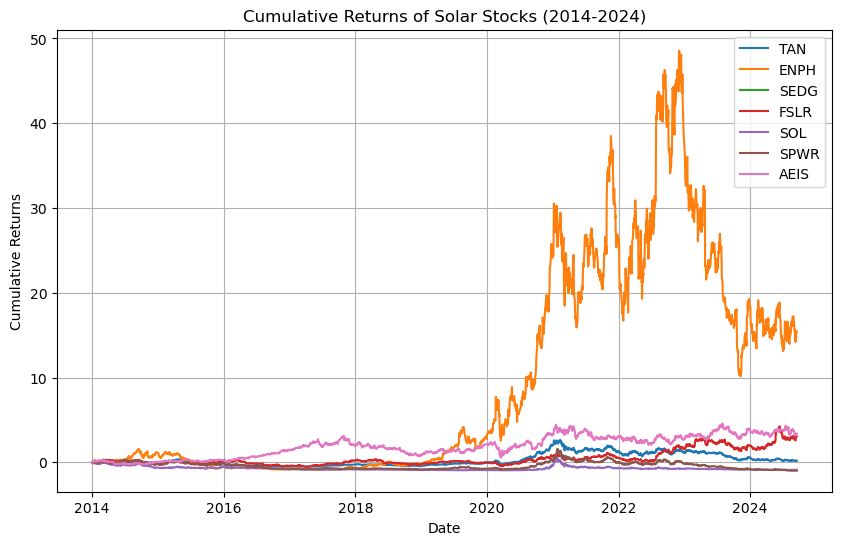

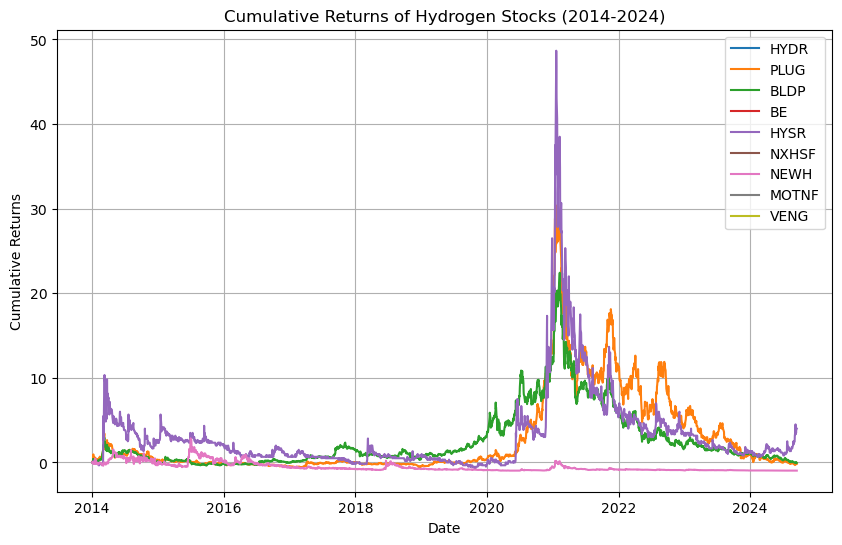

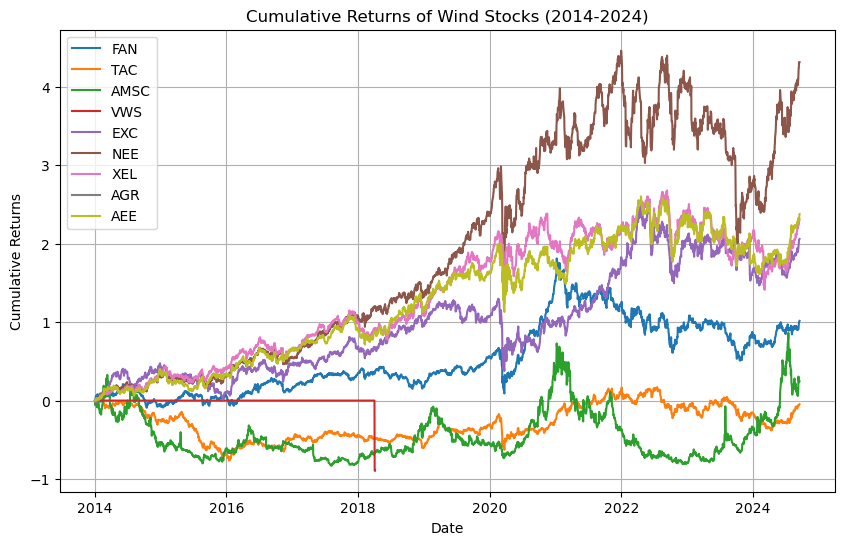

In [54]:
# Plot function for cumulative returns
def plot_cumulative_returns(returns, sector_name):
    plt.figure(figsize=(10,6))
    for column in returns.columns:
        plt.plot(returns.index, returns[column], label=column)
    plt.title(f'Cumulative Returns of {sector_name} Stocks (2014-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Save the figure to a .png file, dynamically naming based on the sector
    plt.savefig(f'{sector_name}_cumulative_returns.png') 
    
    plt.show()

# Plot cumulative returns for Solar, Hydrogen, and Wind sectors
plot_cumulative_returns(solar_returns, 'Solar') 
plot_cumulative_returns(hydrogen_returns, 'Hydrogen')
plot_cumulative_returns(wind_returns, 'Wind')



**###<span style="color:blue">Which individual stocks within each sector have outperformed their peers, and what might be contributing to their success?</span>
Graphs bellow show that in solar industry these stocks outperformed their peers: 
##Solar companies:
* <span style="color:blue">Enphase Energy (ENPH ) is an inventor of microinverter technology that is used in most solar batteries today. Most solar batteries switched to using microinverters and Enphase Energy is supplying practically 100% of the market. Microinverter is a device that converts DC to AC, but it is attached individually to the solar panel. In the past a less convenient technology was used to convert electricity. With the invention of microconverters, most companies switched to using them.
* <span style="color:blue">First Solar (FSLR)</span> is one of the leaders in solar panel business. With the Renewable Energy Act 2021 the demand for solar electricity dramatically increased and the First Solar Company was one of the solar battery companies. First Solar's manufacturing process uses 98 percent less semiconductor material than traditional crystalline silicon solar panels and yields the lowest carbon footprint and fastest energy payback time in the industry.
*  <span style="color:blue">Advanced Energy Industry (AEIS).</span> Their products include thin-film power-conversion systems and power control modules. With the various goverment subsidies related to the renewable energy act and inflation reduction act, and goverment support of American companies that produce semiconductors, AEIS was one of the leaders in the industry.
##Hydrogen Companies:
* Hydrogen industry performance was very rocky over the past 10 years. 
* <span style="color: blue">Sunhydrogen (HYSR)</span> stock spike in 2021, pushed by a sudden international interest in investing in hydrogen technology.
*  <span style="color: blue">Ballard Power Systems (BLDP)</span> and
*  <span style="color: blue">Plug Power (PLUG)</span> were better performing stocks. But with uncertain government policies toward hydrogen power, cost of transportation, and increased interest in solar energy, hydrogen technology stocks are lagging behind and losing investors interest.
##Wind Companies:
* <span style="color: blue">NextEra Energy Company (NEE)</span>. Is a utility company that produces wind energy as well as other types.
* <span style="color: blue">Ameren Corporation(AEE)</span> is an energy company that produced wind energy in addition to fossil fuel energy.
* <span style="color: blue">Xcel Energy(XEL)</span> Is electricity and natural gas company that also produces wind energy. 
* We have to keep in mind that most Wind energy companies are energy and utility companies, that sell gas and oil, as well as wind energy. With the spike of demand on electricity related to AI (power required for data centers), the demand on energy itself is increasing and will increase in the future.
##Goverment policies greatly contribute to the performance of renewable energy companies. It is hard to compete with fossil fuel industry pricewise. Overall, with the Renewable Energy Act passed in 2021, that would require retail electricity suppliers to increase their renewable energy generation each year and generate at least 70% renewable electricity by 2030, we can be certain of the growth of renewable energy.
Hydrogen energy sector is strugglig, as it is still too expensive to produce Hydrogen using elecrolysis. New technologies are popping up, that make production of the hydrogen less expensive, but needs goverment subsidies. We see that is the 2021 there was a spike in prices mostly triggered by promised goverment subsidies(primarily in France). Wind sector energy production almost doubled in the last 10 years. It shows growth. 
Energy demands had growth in the last 5 years, related to the rise of data centers, needed for AI. AI related energy consumption rate increased in the 5 years from 1% to 6% (from overall energy consumption) and keeps growing. In the next 5 years we will see demand in all kinds of energy. Renewable energy included. Several countries in Asia are increasing number of nuclear plants. Fusion electricity is growing in sector - but that technology is not ready and will likely be ready in the next 20 years. 



In [55]:
#Which individual stocks within each sector have outperformed their peers?
# Calculate the total cumulative return at the end of the period for each stock in a sector
def get_top_performers(cumulative_returns):
    # Get the cumulative return at the last date for each stock
    final_returns = cumulative_returns.iloc[-1]
    
    # Sort the stocks by their final cumulative return in descending order
    sorted_returns = final_returns.sort_values(ascending=False)
    
    # Display the top performers
    print("Top Performers:\n")
    pprint(sorted_returns)
    
    return sorted_returns

# Get the top performers for each sector
solar_top_performers = get_top_performers(solar_returns)
hydrogen_top_performers = get_top_performers(hydrogen_returns)
wind_top_performers = get_top_performers(wind_returns)




Top Performers:

ENPH    15.443952
AEIS     3.389322
FSLR     3.061804
TAN      0.198913
SOL     -0.886294
SPWR    -0.999054
SEDG          NaN
Name: 2024-09-16 00:00:00+00:00, dtype: float64
Top Performers:

HYSR     4.000000
BLDP    -0.051429
PLUG    -0.154506
NEWH    -0.965530
HYDR          NaN
BE            NaN
NXHSF         NaN
MOTNF         NaN
VENG          NaN
Name: 2024-09-16 00:00:00+00:00, dtype: float64
Top Performers:

NEE     4.310927
AEE     2.375173
XEL     2.310007
EXC     2.059105
FAN     1.014820
AMSC    0.245977
TAC    -0.047261
VWS          NaN
AGR          NaN
Name: 2024-09-16 00:00:00+00:00, dtype: float64


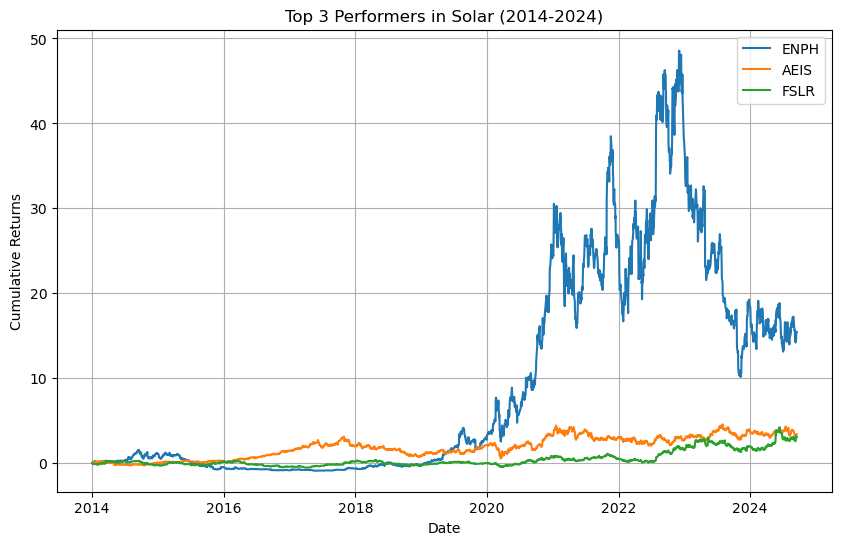

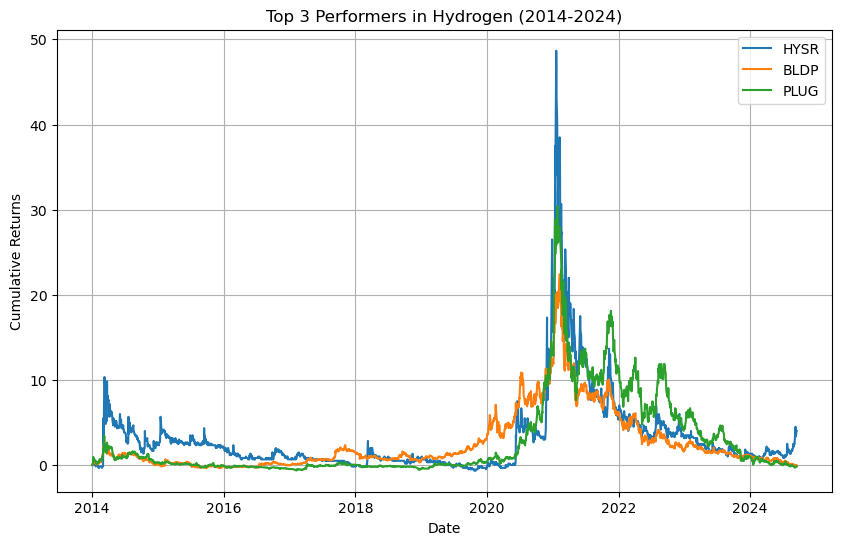

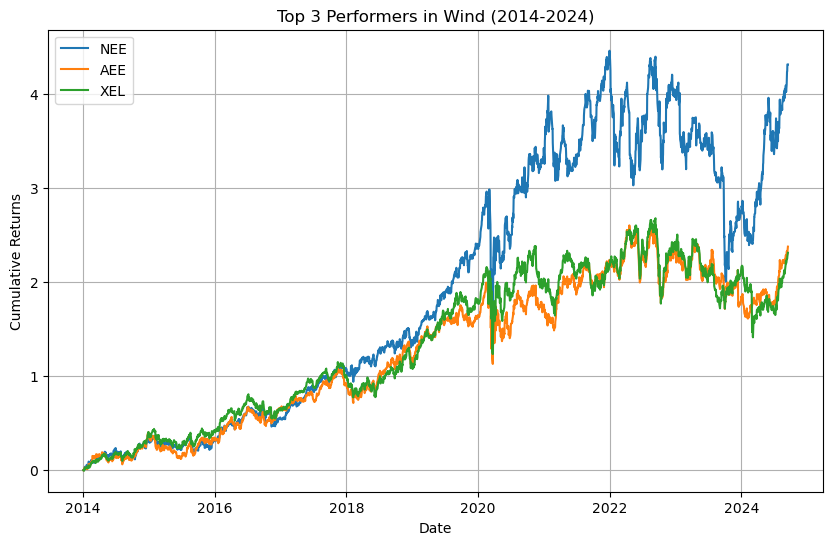

In [56]:
#Plot only 3 top performing stocks
def plot_top_performers(returns, top_performers, sector_name, top_n=3):
    plt.figure(figsize=(10,6))
    for stock in top_performers.index[:top_n]:
        plt.plot(returns.index, returns[stock], label=stock)
    plt.title(f'Top {top_n} Performers in {sector_name} (2014-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Save the figure to a .png file
    plt.savefig(f'top_{top_n}_{sector_name}_performers.png')
    
    plt.show()

# Plot the top 3 performers in each sector
plot_top_performers(solar_returns, solar_top_performers, 'Solar')
plot_top_performers(hydrogen_returns, hydrogen_top_performers, 'Hydrogen')
plot_top_performers(wind_returns, wind_top_performers, 'Wind')
